<a href="https://colab.research.google.com/github/hakankocaman/PratikPythonAraclari/blob/master/Error_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_errors(reference, data):
    """
    Referans ve veri dizileri arasındaki farklı hata metriklerini hesaplar.

    Parametreler:
        reference (np.ndarray): Referans veri dizisi.
        data (np.ndarray): Karşılaştırılacak veri dizisi.

    Döndürdükleri:
        tuple: (M, ME, MAE, RMSE, SDE, MaxE, MAD) şeklinde hata metrikleri.
    """
    errors = data - reference
    M = np.mean(data)
    ME = np.mean(errors)
    MAE = np.mean(np.abs(errors))
    RMSE = np.sqrt(np.mean(errors**2))  # Düzeltilmiş RMSE hesabı
    SDE = np.std(errors)
    MaxE = np.max(np.abs(errors))
    MAD = np.median(np.abs(errors - np.median(errors)))
    return M, ME, MAE, RMSE, SDE, MaxE, MAD

# Excel dosyasının yolu (buraya kendi dosya yolunuzu girin)
excel_file_path = 'veri_noktalari.xlsx'

# Verileri Excel'den yükle
df = pd.read_excel(excel_file_path, decimal=',')
print(df)

# Kullanıcıdan başlangıç ve bitiş noktalarını al
while True:
    try:
        start_point = input("Başlangıç noktasını girin (ör. b.107): ")
        end_point = input("Bitiş noktasını girin (ör. b.111): ")

        # Girilen noktaların veri setinde olup olmadığını kontrol et
        if start_point not in df['Nokta No'].values or end_point not in df['Nokta No'].values:
            raise ValueError("Girilen noktalar veri setinde bulunamadı.")

        # Başlangıç noktasının bitiş noktasından önce geldiğinden emin ol
        if df[df['Nokta No'] == start_point].index[0] > df[df['Nokta No'] == end_point].index[0]:
            raise ValueError("Başlangıç noktası bitiş noktasından sonra olamaz.")

        break  # Eğer her şey doğruysa döngüden çık
    except ValueError as e:
        print(f"Hata: {e}. Lütfen tekrar deneyin.")

# Filtreleme işlemi: Sadece belirtilen aralıktaki noktaları al
filtered_df = df[(df['Nokta No'] >= start_point) & (df['Nokta No'] <= end_point)]

# Hesaplamalar
results = {}
for method in ['TG03', 'Google', 'HGM']:
    results[method] = calculate_errors(filtered_df['I_elipsoid'].values, filtered_df[method].values)

df_results = pd.DataFrame(results, index=["M", "ME", "MAE", "RMSE", "SDE", "MaxE", "MAD"]).T
df_results = df_results.round(3)

# Tabloyu yazdır
print(f"\n{start_point}-{end_point} Aralığı Hata Metrikleri:")
print(df_results)

# df_results'ı Excel'e export etme
output_file_path = f"\n{start_point}-{end_point}.xlsx"
df_results.to_excel(output_file_path, index=True)

print(f"Hata metrikleri başarıyla '{output_file_path}' dosyasına kaydedildi.")

   Nokta No  I_elipsoid     TG03      Google     HGM
0      b.52      76.076   74.720   77.779091   83.31
1      b.58      72.361   71.011   74.302055   81.15
2      b.59      72.748   71.399   73.540100   80.24
3      b.61      73.064   71.716   72.592484   79.82
4      b.62      73.833   72.486   71.228729   80.44
..      ...         ...      ...         ...     ...
76    b.248     135.120  133.784  140.769135  142.84
77    b.249     133.851  132.515  141.947739  142.22
78    b.251     133.882  132.546  143.937576  141.72
79    b.252     134.178  132.842  144.033890  141.33
80    b.256     135.402  134.067  142.481186  139.73

[81 rows x 5 columns]
Başlangıç noktasını girin (ör. b.107): b.239
Bitiş noktasını girin (ör. b.111): b.256

b.239-b.256 Aralığı Hata Metrikleri:
              M     ME    MAE   RMSE    SDE    MaxE    MAD
TG03    133.735 -1.336  1.336  1.336  0.000   1.336  0.000
Google  141.059  5.988  6.240  6.757  3.130  10.056  2.448
HGM     142.464  7.393  7.393  7.731  2.

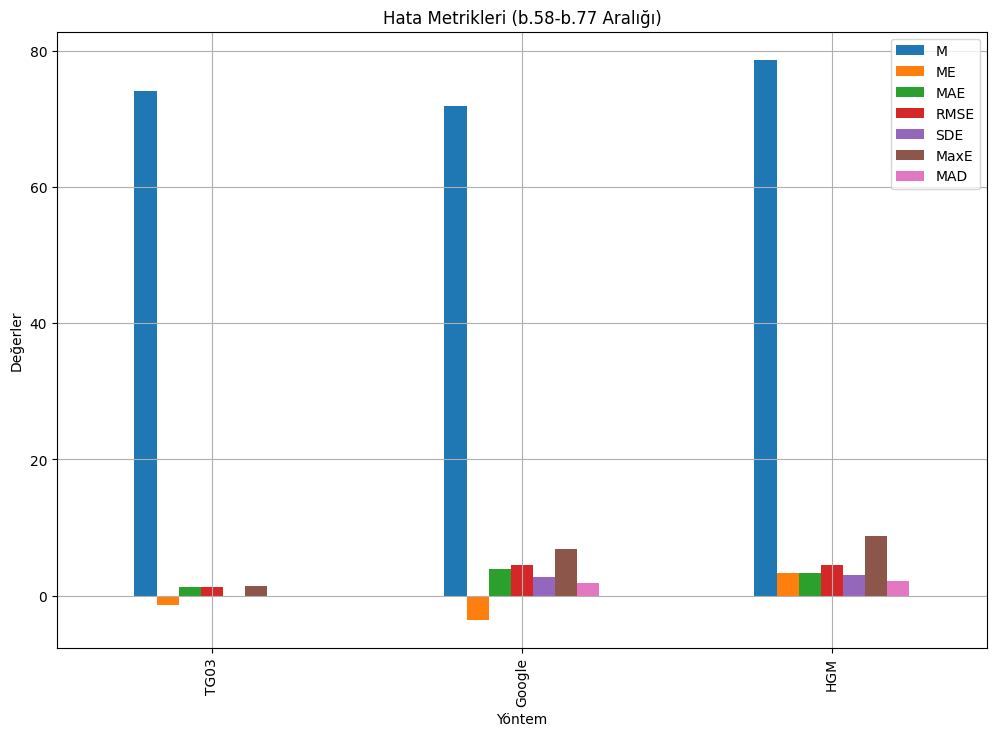

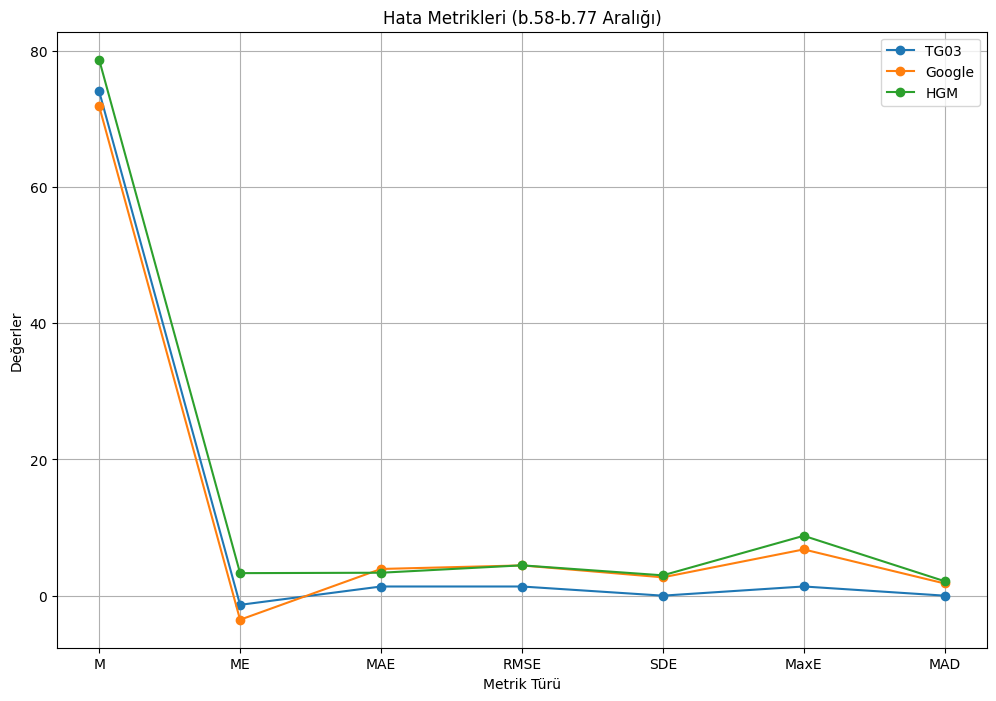

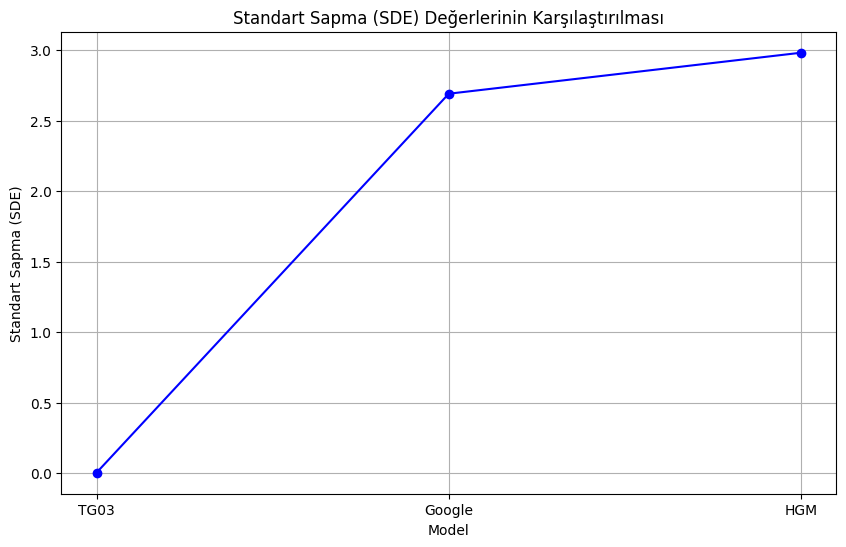

In [6]:

# Bar grafik oluşturma
df_results.plot(kind='bar', figsize=(12, 8))
plt.title(f'Hata Metrikleri ({start_point}-{end_point} Aralığı)')
plt.xlabel('Yöntem')
plt.ylabel('Değerler')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Çizgi grafik oluşturma
plt.figure(figsize=(12, 8))
for method in df_results.index:
    plt.plot(df_results.columns, df_results.loc[method], marker='o', label=method)

plt.title(f'Hata Metrikleri ({start_point}-{end_point} Aralığı)')
plt.xlabel('Metrik Türü')
plt.ylabel('Değerler')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Standart sapma (SDE) değerlerini al
sde_values = df_results['SDE']

# Çizgi grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(sde_values.index, sde_values, marker='o', linestyle='-', color='b')
plt.title('Standart Sapma (SDE) Değerlerinin Karşılaştırılması')
plt.xlabel('Model')
plt.ylabel('Standart Sapma (SDE)')
plt.grid(True)
plt.show()

   Nokta No  I_elipsoid     TG03      Google     HGM
0      b.52      76.076   74.720   77.779091   83.31
1      b.58      72.361   71.011   74.302055   81.15
2      b.59      72.748   71.399   73.540100   80.24
3      b.61      73.064   71.716   72.592484   79.82
4      b.62      73.833   72.486   71.228729   80.44
..      ...         ...      ...         ...     ...
76    b.248     135.120  133.784  140.769135  142.84
77    b.249     133.851  132.515  141.947739  142.22
78    b.251     133.882  132.546  143.937576  141.72
79    b.252     134.178  132.842  144.033890  141.33
80    b.256     135.402  134.067  142.481186  139.73

[81 rows x 5 columns]

Group 1 Metrikleri:
             M    SDE    MAD
TG03    74.008  1.675  1.208
Google  71.824  1.872  1.919
HGM     78.661  1.745  1.890

Group 2 Metrikleri:
              M    SDE    MAD
TG03    102.262  0.450  0.288
Google   99.746  0.966  0.800
HGM     108.466  1.192  1.130

Group 3 Metrikleri:
              M    SDE    MAD
TG03    121.

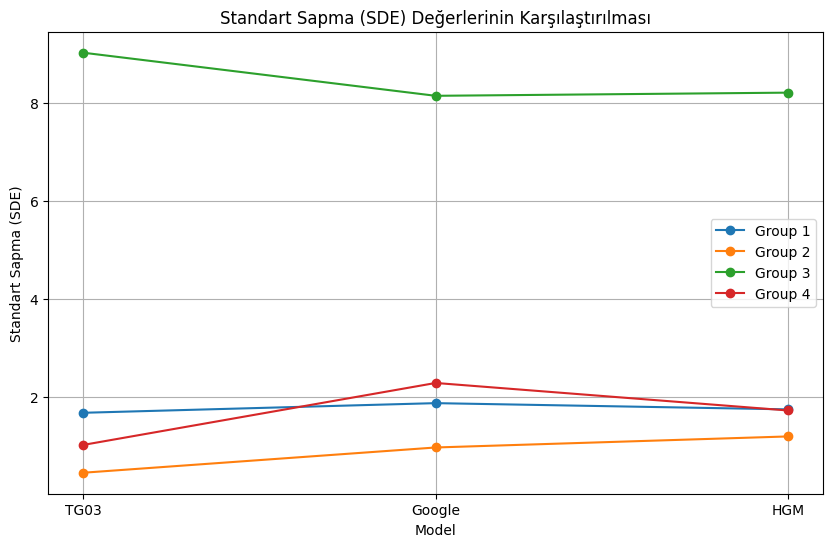

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_metrics(data):
    """
    Veri dizileri için ortalama (M), hataların standart sapması (SDE) ve ortanca mutlak sapma (MAD) metriklerini hesaplar.

    Parametreler:
        data (np.ndarray): Veri dizisi.

    Döndürdükleri:
        tuple: (M, SDE, MAD) şeklinde metrikler.
    """
    M = np.mean(data)
    SDE = np.std(data)
    MAD = np.median(np.abs(data - np.median(data)))
    return M, SDE, MAD

# Excel dosyasının yolu (buraya kendi dosya yolunuzu girin)
excel_file_path = 'veri_noktalari.xlsx'

# Verileri Excel'den yükle
df = pd.read_excel(excel_file_path, decimal=',')
print(df)

# Grupların başlangıç ve bitiş noktaları
groups = [
    ('b.58', 'b.77'),
    ('b.107', 'b.111'),
    ('b.146', 'b.225'),
    ('b.239', 'b.256')
]

# Her grup için hesaplamalar
group_results = {}
for group_num, (start_point, end_point) in enumerate(groups, start=1):
    # Filtreleme işlemi: Sadece belirtilen aralıktaki noktaları al
    filtered_df = df[(df['Nokta No'] >= start_point) & (df['Nokta No'] <= end_point)]

    results = {}
    for method in ['TG03', 'Google', 'HGM']:
        results[method] = calculate_metrics(filtered_df[method].values)

    group_results[f'Group {group_num}'] = pd.DataFrame(results, index=["M", "SDE", "MAD"]).T

# Her grup için metrikleri yazdır
for group_name, result_df in group_results.items():
    print(f"\n{group_name} Metrikleri:")
    result_df=result_df.round(3)
    print(result_df)
    # df_results'ı Excel'e export etme
    output_file_path = f"\n{group_name}.xlsx"
    result_df.to_excel(output_file_path, index=True)

print(f"Hata metrikleri başarıyla '{output_file_path}' dosyasına kaydedildi.")

# Standart Sapma (SDE) Değerlerini Çizgi Grafikte Gösterme
plt.figure(figsize=(10, 6))

for group_name, result_df in group_results.items():
    plt.plot(result_df.index, result_df['SDE'], marker='o', linestyle='-', label=group_name)

plt.title('Standart Sapma (SDE) Değerlerinin Karşılaştırılması')
plt.xlabel('Model')
plt.ylabel('Standart Sapma (SDE)')
plt.legend()
plt.grid(True)
plt.show()


# Yeni Bölüm